<a href="https://colab.research.google.com/github/yooyeollee/Python1/blob/main/201902697_11_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_204 (Dense)           (None, 10)                150       
                                                                 
 dense_205 (Dense)           (None, 30)                330       
                                                                 
 dense_206 (Dense)           (None, 40)                1240      
                                                                 
 dense_207 (Dense)           (None, 1)                 41        
                                                                 
 dropout_18 (Dropout)        (None, 1)                 0         
                                                                 
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
7/7 [==============================] - 

<function matplotlib.pyplot.show(*args, **kw)>

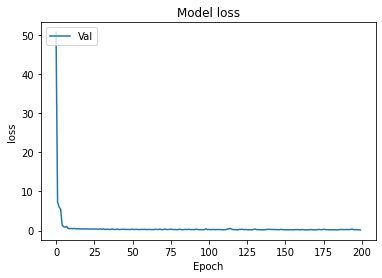

In [ ]:
#201902697 이우열 숙제 1번

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

path = 'https://raw.githubusercontent.com/yooyeollee/Python1/main/heart%20disease%20classification%20dataset.csv'
df = pd.read_csv(path)
df.isnull().sum().sort_values(ascending=False).head(20)
df = pd.get_dummies(df)
df = df.fillna(df.mean())
normalization_df=(df-df.mean())/df.std()

cols_train=['age',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang', 'oldpeak',	'slope',	'ca',	'thal','sex_female', 'sex_male']
X_train_pre = df[cols_train]

y = df['target_yes'].values

X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.1) #test dataset을 10%로

model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.add(Dropout(0.25))
model.summary()
#drop-out도 실습

model.compile(optimizer ='adam', loss = 'mean_squared_error')

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath="./data/model/all"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#val_accuracy가 제일 좋은 모델을 저장(save)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stopping_callback, checkpointer])


plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Val', 'Train'], loc = 'upper left')
plt.show


In [ ]:
#201902697 이우열 숙제 2번

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

path = 'https://raw.githubusercontent.com/yooyeollee/Python1/main/heart%20disease%20classification%20dataset.csv'
df = pd.read_csv(path)
df.isnull().sum().sort_values(ascending=False).head(20)
df = pd.get_dummies(df)
df = df.fillna(df.mean())
normalization_df = (df-df.mean())/df.std()

cols_train=['age',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang', 'oldpeak',	'slope',	'ca',	'thal','sex_female', 'sex_male']
X_train_pre = df[cols_train]

y = df['target_yes'].values

X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.1, random_state = 3)

k = 6
skf = StratifiedKFold(n_splits = k, shuffle = True, random_state = 3)

for train, test in skf.split(normalization_df, y):
   model = Sequential()
   model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
   model.add(Dense(30, activation='relu'))
   model.add(Dense(40, activation='relu'))
   model.add(Dense(1))
   model.summary()

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

history = model.fit(X_test, y_test, epochs = 1000, batch_size = 24)

score = model.evaluate(X_test, y_test)
print('accuracy:', score[1])

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_176 (Dense)           (None, 10)                150       
                                                                 
 dense_177 (Dense)           (None, 30)                330       
                                                                 
 dense_178 (Dense)           (None, 40)                1240      
                                                                 
 dense_179 (Dense)           (None, 1)                 41        
                                                                 
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)          

1/1 [==============================] - 0s 146ms/step - loss: 0.0467 - accuracy: 0.9677
accuracy: 0.9677419066429138
